In [100]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [101]:
file = Path("crypto_data.csv")
df = pd.read_csv(file)
df.sample(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
297,TAM,TamaGucci,Scrypt,True,PoW/PoS/PoC,NaN,5300000
893,SHA,Shacoin,SHA-256,True,PoS,NaN,350000000
1146,VBK,VeriBlock,SHA-256,True,PoW,NaN,2100000000
616,ACID,AcidCoin,SHA-256,True,PoW,NaN,4500000000
62,CBX,CryptoBullion,Scrypt,True,PoW/PoS,1.039117e+06,1000000
851,DAXX,DaxxCoin,Ethash,True,PoW,5.208918e+08,10000000000
493,EMIGR,EmiratesGoldCoin,SHA-256,False,PoW,NaN,4000000
459,COVAL,Circuits of Value,Multiple,True,PoW,1.000000e+09,1200000000
492,BBCC,BaseballCardCoin,Scrypt,True,PoW/PoS,NaN,19000000
834,KNGN,KingN Coin,Scrypt,False,PoW/PoS,NaN,420000


In [102]:
df = df[df["IsTrading"] == True]
df = df.dropna(how='any',axis=0)

df.head(20)


,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,True,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,True,PoW,1.133597e+08,210000000


In [103]:
totalMineddf = df.groupby(["CoinName"]).TotalCoinsMined.sum().reset_index()
totalMineddf

,CoinName,TotalCoinsMined
0,ClubCoin,1.036219e+08
1,16BitCoin,0.000000e+00
2,1717 Masonic Commemorative Token,1.618033e+06
3,1Credit,8.821300e+04
4,404Coin,1.055185e+09
...,...,...
679,eMark,0.000000e+00
680,gCn Coin,1.630551e+11
681,iBankCoin,4.526324e+06
682,iDealCash,1.404158e+09


In [104]:
ZeroMindeddf = totalMineddf[totalMineddf["TotalCoinsMined"] == 0]
ZeroMindeddf

,CoinName,TotalCoinsMined
1,16BitCoin,0.0
6,808,0.0
9,ACoin,0.0
10,AEON,0.0
20,Aero Coin,0.0
...,...,...
670,Zenad,0.0
672,ZestCoin,0.0
677,Zurcoin,0.0
679,eMark,0.0


In [105]:
zeroMinedNames = ZeroMindeddf["CoinName"].tolist()
df = df[~df.CoinName.isin(zeroMinedNames)]
df.head(30)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000
10,DASH,Dash,X11,True,PoW/PoS,9.031294e+06,22000000
11,XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0
12,ETC,Ethereum Classic,Ethash,True,PoW,1.133597e+08,210000000
13,ZEC,ZCash,Equihash,True,PoW,7.383056e+06,21000000


In [106]:
df = df.drop(['CoinName'], axis=1)
df.shape

(533, 6)

In [107]:
dummies_df = pd.get_dummies(df)
dummies_df.head()
dummies_df.shape

(533, 913)

In [108]:
dummies_df["TotalCoinsMined"] = np.log10(dummies_df["TotalCoinsMined"])
dummies_df.head()

C:\Users\Beep Boop\anaconda3_3\envs\PythonData\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,IsTrading,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,True,1.623249,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,True,9.023329,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,True,10.466563,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,True,7.253512,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,True,8.032152,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
dummies_df = dummies_df.dropna(how='any',axis=1)
pca = PCA(n_components = .9)
pca.fit(dummies_df)

PCA(n_components=0.9)

In [110]:
pca.components_


array([[ 2.22044605e-15,  3.59216464e-03, -2.70240820e-03, ...,
         3.05403547e-04, -3.28367742e-03, -3.27015212e-03],
       [-2.22044605e-16,  1.61824120e-03, -5.43764145e-03, ...,
         2.55037426e-03,  9.14179495e-04,  9.08856526e-04],
       [-3.85108612e-16, -3.31495577e-03,  1.09868846e-03, ...,
         1.08843793e-03, -1.87697479e-03, -1.86501226e-03],
       ...,
       [ 1.07726328e-15, -1.90537148e-03,  1.08864036e-02, ...,
        -7.59969178e-02,  2.87830983e-04,  4.55413930e-03],
       [-9.64723093e-16,  2.09803547e-03,  6.83504245e-03, ...,
        -3.10539787e-03,  2.50168046e-03,  4.62091165e-03],
       [-2.98088481e-15,  2.18022869e-15, -6.05814470e-16, ...,
         3.98986399e-17,  8.41340886e-17, -3.77302356e-17]])

In [111]:
print(len(pca.components_))
print(len(pca.components_[0]))

346
912


In [112]:
tsne = TSNE(verbose = 1, perplexity = 40, n_iter=300)
tsne_results = tsne.fit_transform(dummies_df)
tsne_results

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 533 samples in 0.078s...
[t-SNE] Computed neighbors for 533 samples in 0.387s...
[t-SNE] Computed conditional probabilities for sample 533 / 533
[t-SNE] Mean sigma: 0.373989
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.470776
[t-SNE] KL divergence after 300 iterations: 0.634534


array([[-10.417471  ,  -0.16320473],
       [-11.254683  ,  -0.3697343 ],
       [-10.682062  ,   6.7436657 ],
       ...,
       [  2.023286  ,  -8.501267  ],
       [  0.02067076,  -5.500941  ],
       [  6.7768855 ,   8.836003  ]], dtype=float32)

In [113]:
tsne_df = pd.DataFrame(columns = ["row1", "row2"])



In [114]:
tsne_df['row1'] = tsne_results[:,0]
tsne_df['row2'] = tsne_results[:,1]

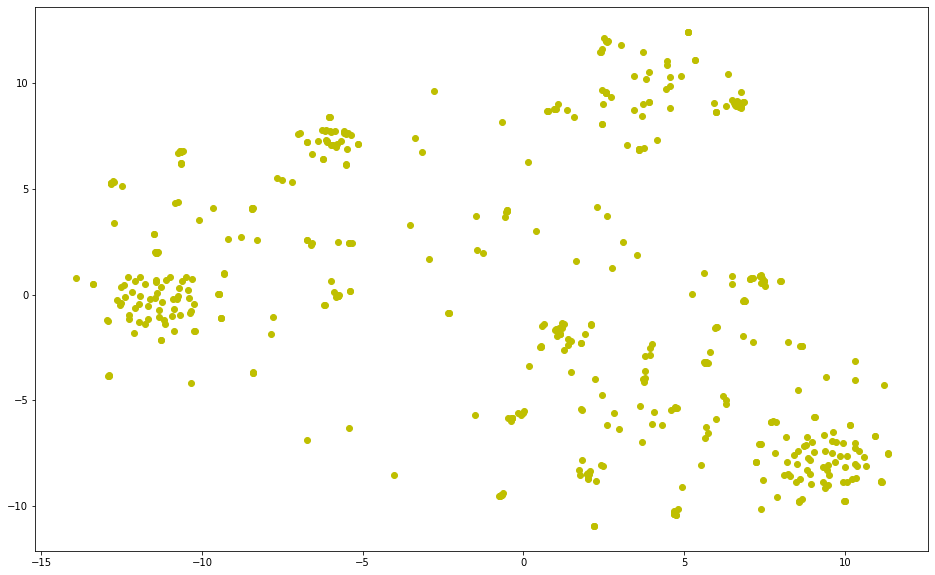

In [117]:
plt.figure(figsize=(16,10))
plt.scatter(x=tsne_df['row1'] ,y=tsne_df['row2'], color="y")
